In [1]:
import os
import random
import cv2 as cv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
import nbformat
from PIL import Image
import math


In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path='/content/drive/MyDrive/Cvpr/animals'

In [5]:


categories = [category for category in os.listdir(data_path)]
print(categories)


['panda', 'dogs', 'cats']


# **Data Loading and Preprocessing**

In [6]:
data=[]


for j in categories:
  path=os.path.join(data_path,j)
  num_c=categories.index(j)

  for img in tqdm(os.listdir(path)):
    try:
      # reading
      img_arr=cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
      # resize
      img_arr=cv.resize(img_arr,(32,32),interpolation=cv.INTER_AREA)
      # append
      data.append((img_arr, num_c))

    except Exception as e:
      pass

print(len(data))



100%|██████████| 1000/1000 [00:29<00:00, 33.41it/s]

3000


In [7]:
random.shuffle(data)

images = np.array([item[0] for item in data])  # Image data
labels = np.array([item[1] for item in data])  # Labels

images_flattened = images.reshape(len(images), -1)  # Reshape images to (n_samples, 32*32)

# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Print the shape of the data
print("Flattened image shape:", images.shape)
print("Encoded labels shape:", labels.shape)



Flattened image shape: (3000, 32, 32)
Encoded labels shape: (3000,)


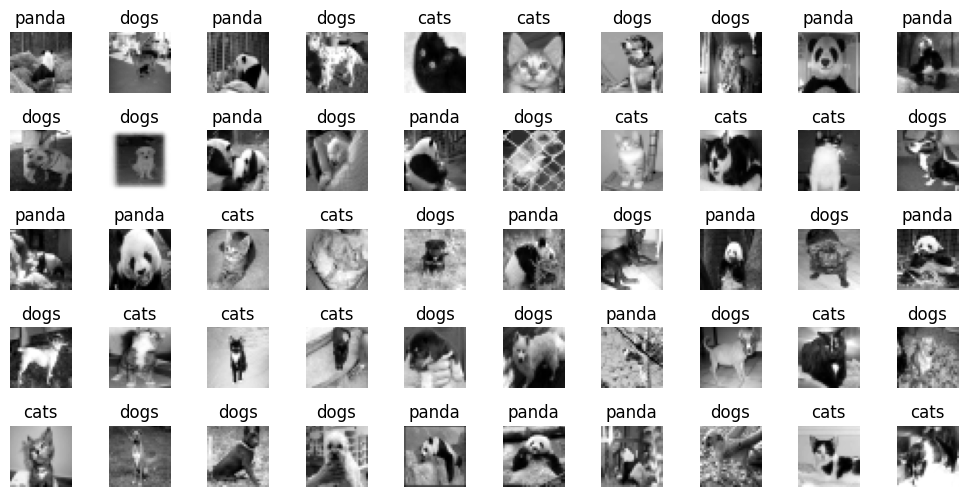

In [8]:
plt.figure(figsize=(10, 10))
for i in range(50):
    plt.subplot(10, 10, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(categories[labels[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

## **KNN Implementation and visualizing results

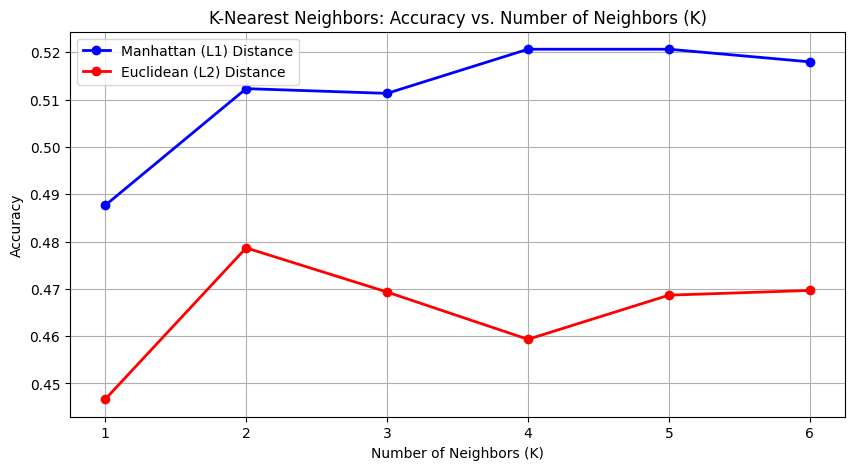

In [9]:


k_values=[1,2,3,4,5,6]
man_accuracy=[]
euc_accuracy= []

for k in k_values:
  man_model=KNeighborsClassifier(n_neighbors=k,metric='manhattan')
  man_model.fit(images_flattened,labels_encoded)
  man_score=cross_val_score(man_model,images_flattened,labels_encoded,cv=5)
  man_accuracy.append(man_score.mean())

  ecu_model=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  ecu_model.fit(images_flattened,labels_encoded)
  ecu_score=cross_val_score(ecu_model,images_flattened,labels_encoded,cv=5)
  euc_accuracy.append(ecu_score.mean())

plt.figure(figsize=(10, 5))
plt.plot(k_values,man_accuracy,marker='o',color='blue',label='Manhattan (L1) Distance',linewidth=2)
plt.plot(k_values,euc_accuracy,marker='o',color='red',label='Euclidean (L2) Distance',linewidth=2)
plt.title('K-Nearest Neighbors: Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()





# **Discussion**



It focused on focused on implementing image classification using the K-Nearest Neighbors (KNN) algorithm with two distance metrics: Manhattan (L1) and
Euclidean (L2), comparing their performance.
1.Grayscale Conversion,image resizing and flattening
2.Various values were tested for both distance metrices
3.5 fold cross validation and accuracy ensured a reliable evaluation of model along with distance metrices
4.The Manhattan distance performed better for smaller k values, while Euclidean distance performed slightly better for larger k. The optimal value of k was identified to be between 3 and 5
5.The accuracy results were visualized, showing how both distance metrics performed as k changed, providing insights into their effectiveness for image classification.

[2916 2625 1151 1742  669]
[1 2 1 1 1]
[2 2 1 1 0]


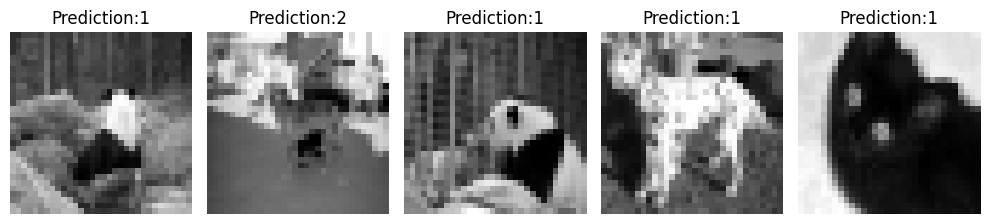

In [10]:
num_pred=5
indices=np.random.choice(len(images),num_pred,replace=False)
print(indices)
s_img=images[indices]
s_labels=labels[indices]
pred=man_model.predict(s_img.reshape(num_pred,-1))

print(pred)
print(s_labels)
plt.figure(figsize=(10, 10))
for i in range(num_pred):
  plt.subplot(1,num_pred,i+1)
  s_img=images[i].reshape(32,32)
  plt.imshow(s_img, cmap="gray")
  plt.title(f'Prediction:{pred[i]}')
  plt.axis('off')

plt.tight_layout()
plt.show()



[1975 2666 2588 2764 1762]
[1 1 2 1 1]
[2 1 2 1 1]


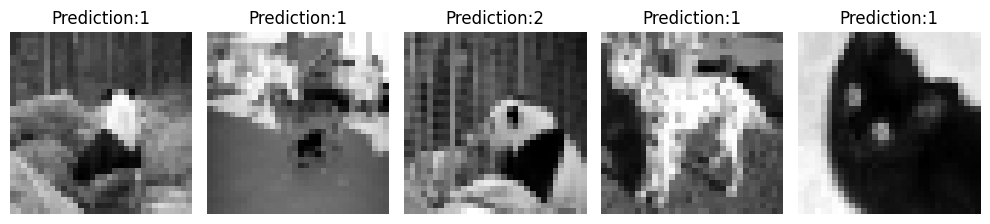

In [11]:
num_pred=5
indices=np.random.choice(len(images),num_pred,replace=False)
print(indices)
s_img=images[indices]
s_labels=labels[indices]
pred=ecu_model.predict(s_img.reshape(num_pred,-1))

print(pred)
print(s_labels)
plt.figure(figsize=(10, 10))
for i in range(num_pred):
  plt.subplot(1,num_pred,i+1)
  s_img=images[i].reshape(32,32)
  plt.imshow(s_img, cmap="gray")
  plt.title(f'Prediction:{pred[i]}')
  plt.axis('off')

plt.tight_layout()
plt.show()